<a href="https://colab.research.google.com/github/Sand08/Statistics-and-Machine-Learning/blob/main/SML_Excercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import gspread
import pandas as pd
from google.auth import default
from google.colab import auth

# Authenticate and connect to Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open the spreadsheet and load the data
spreadsheet = gc.open_by_key('10HRZN-HbrUP9QeZYEyWPPfzcw3et-seMVZI2Tbjqw1U')
worksheet = spreadsheet.get_worksheet(0)
df = pd.DataFrame(worksheet.get_all_records())  # Use get_all_records for structured data

# Remove non-numerical columns with NaN values
df = df.drop(columns=['Workout_Type', 'Gender'], errors='ignore')

# Convert numeric columns to appropriate types
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Selecting only numerical columns for descriptive statistics
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Calculating descriptive statistics
descriptive_stats = {
    "Mean": numerical_data.mean(),
    "Median": numerical_data.median(),
    "Mode": numerical_data.mode().iloc[0],  # Use the first row of mode in case of multiple modes
    "Standard Deviation": numerical_data.std(),
    "Variance": numerical_data.var(),
    "Range": numerical_data.max() - numerical_data.min()
}

# Converting to a DataFrame for better presentation
descriptive_stats_df = pd.DataFrame(descriptive_stats)

# Round to 2 decimal points
descriptive_stats_df = descriptive_stats_df.round(2)

# Display the descriptive statistics DataFrame
print("Descriptive Statistics of Gym Data:")
display(descriptive_stats_df)



Descriptive Statistics of Gym Data:


,Mean,Median,Mode,Standard Deviation,Variance,Range
Age,38.68,40.00,43.00,12.18,148.38,41.00
Weight (kg),73.85,70.00,57.70,21.21,449.76,89.90
Height (m),1.72,1.71,1.62,0.13,0.02,0.50
Max_BPM,179.88,180.00,198.00,11.53,132.84,39.00
Avg_BPM,143.77,143.00,132.00,14.35,205.78,49.00
Resting_BPM,62.22,62.00,50.00,7.33,53.69,24.00
Session_Duration (hours),1.26,1.26,1.03,0.34,0.12,1.50
Calories_Burned,905.42,893.00,883.00,272.64,74333.40,1480.00
Fat_Percentage,24.98,26.20,28.10,6.26,39.18,25.00
Water_Intake (liters),2.63,2.60,3.50,0.60,0.36,2.20



**ABOUT DATA**

The dataset appeared to have multiple columns, including demographic information (e.g., age, gender), physical metrics (e.g., weight, height, BMI), and workout-related data (e.g., session duration, calories burned, workout frequency).

I have calculated the descriptive statistics (central tendancy) mean, median, mode and dispersion statistics (standard deviation, variance, and range) for the numerical columns.

The .round(2) method is applied to the entire descriptive_stats_df DataFrame,
ensuring all values are rounded to 2 decimal points.

**KEY INSIGHTS**

Unique values in 'Gender': ['Male' 'Female']


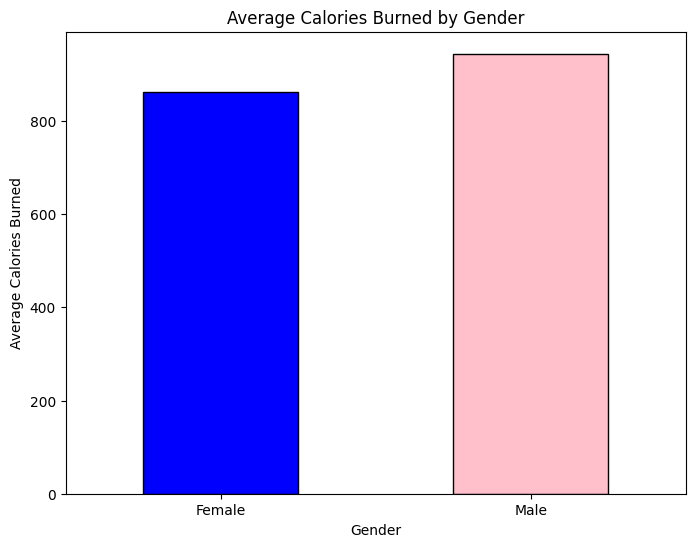

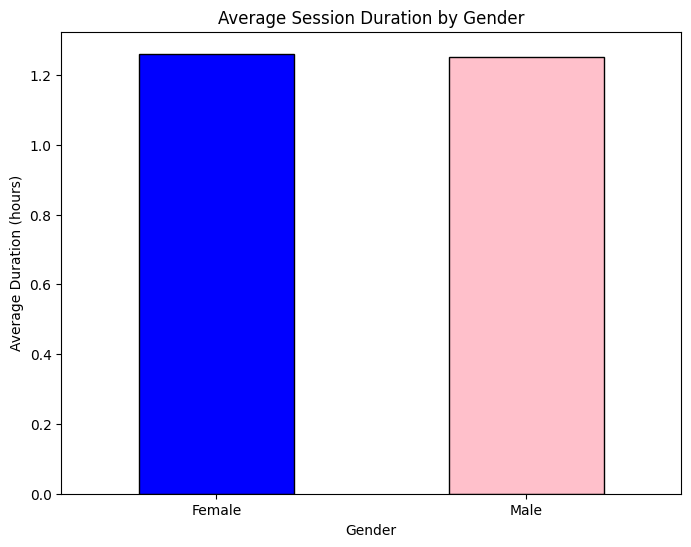

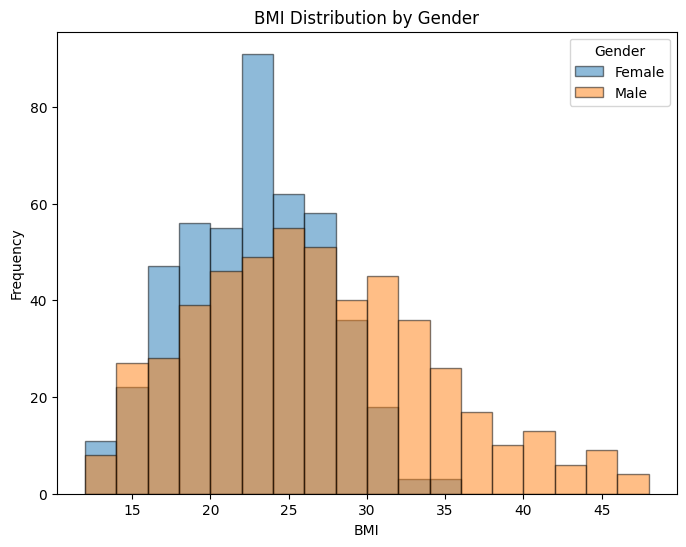

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import gspread
import pandas as pd
from google.auth import default
from google.colab import auth

# Authenticate and connect to Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Replace '10HRZN-HbrUP9QeZYEyWPPfzcw3et-seMVZI2Tbjqw1U' with your actual spreadsheet key
spreadsheet = gc.open_by_key('10HRZN-HbrUP9QeZYEyWPPfzcw3et-seMVZI2Tbjqw1U')
worksheet = spreadsheet.get_worksheet(0)  # Assuming data is in the first sheet
df = pd.DataFrame(worksheet.get_all_records())

# Inspect the unique values in the 'Gender' column
print("Unique values in 'Gender':", df['Gender'].unique())

# Filter the dataset for valid genders
valid_genders = ['Male', 'Female']
filtered_data = df[df['Gender'].isin(valid_genders)]

# Grouping data by Gender
gender_groups = filtered_data.groupby('Gender')

# Visualization 1: Average Calories Burned by Gender
avg_calories = gender_groups['Calories_Burned'].mean()

plt.figure(figsize=(8, 6))
avg_calories.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')
plt.title('Average Calories Burned by Gender')
plt.ylabel('Average Calories Burned')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

# Visualization 2: Average Session Duration by Gender
avg_duration = gender_groups['Session_Duration (hours)'].mean()

plt.figure(figsize=(8, 6))
avg_duration.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')
plt.title('Average Session Duration by Gender')
plt.ylabel('Average Duration (hours)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

# Visualization 3: Distribution of BMI by Gender

plt.figure(figsize=(8, 6))
bins = range(int(filtered_data['BMI'].min()), int(filtered_data['BMI'].max()) + 1, 2)  # Define bin size
for gender, group in gender_groups:
    plt.hist(group['BMI'], bins=bins, alpha=0.5, label=gender, edgecolor= 'black')

plt.title('BMI Distribution by Gender')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.show()


**1. Average Calories Burned by Gender**

**Visualization**: A bar chart showing the average calories burned by males and females.

**Key Insights:**

**Purpose**: This chart compares the average calories burned between genders to identify trends in workout intensity or duration.

**Interpretation**:
If males have a significantly higher value, it may indicate longer sessions, higher intensity workouts, or different workout preferences.
A smaller gap or equality between genders might suggest similar workout habits.

**2. Average Session Duration by Gender**

**Visualization**: A bar chart showing the average duration of workout sessions for males and females.

**Key Insights:**

**Purpose**: This chart helps understand how much time each gender spends on workouts on average.

**Interpretation**:
If males or females spend more time, it could reflect their workout goals (e.g., strength training vs. cardio).
Shorter durations could suggest efficient, high-intensity workouts, like HIIT, while longer durations might indicate endurance-based activities.


**3. Distribution of BMI by Gender**

**The histogram shows the BMI distribution for males and females:**

**Peak BMI Range:**
Females have a peak frequency in the 20-25 BMI range, which generally aligns with the normal BMI category.
Males have a broader distribution, with significant representation in the 25-30 range, moving into the overweight category.

**Overlap:**
There is substantial overlap in the 20-30 BMI range, suggesting that both genders share similar BMI distributions in this range.

**Higher BMI:**
Males dominate the higher BMI ranges (30+), indicating that they are more likely to fall into the overweight or obese category.

**Lower BMI:**
A small portion of females falls into the lower BMI range (below 18), potentially indicating underweight individuals.

**Key Takeaways:**
Females are more concentrated in the normal BMI range.
Males show a wider spread, with more individuals in the overweight and obese categories.

<ipython-input-10-ca889c9eabcc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_grouped = df.groupby(['Gender', 'Age_Group']).agg({


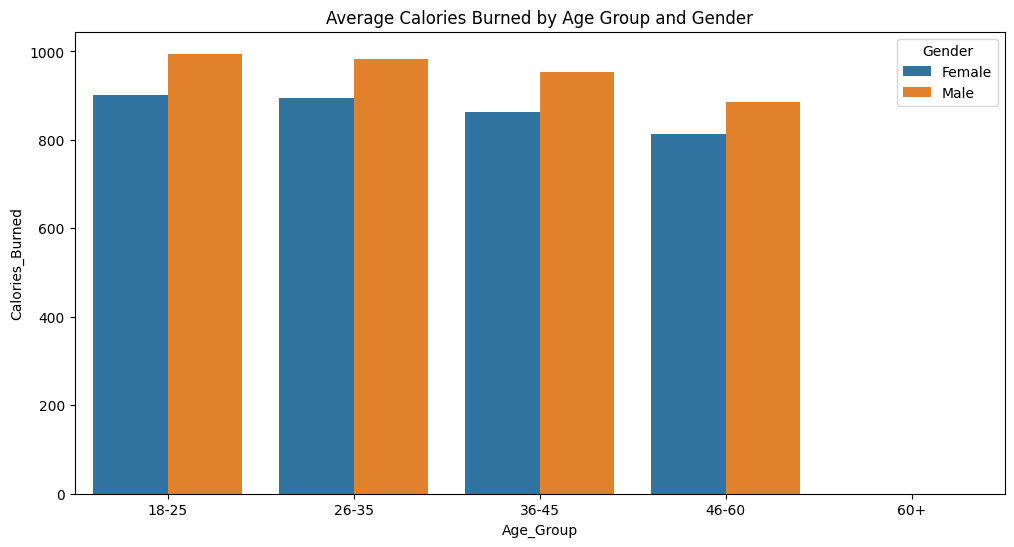

In [10]:
# Group by both gender and age group
gender_age_grouped = df.groupby(['Gender', 'Age_Group']).agg({
    'Calories_Burned': 'mean',
    'Session_Duration (hours)': 'mean'
}).reset_index()

# Example visualization
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(data=gender_age_grouped, x='Age_Group', y='Calories_Burned', hue='Gender')
plt.title('Average Calories Burned by Age Group and Gender')
plt.show()


**Key Observations Calories Burned by Gender:**

Males consistently burn more calories across all age groups compared to females.

This could suggest that males are engaging in higher-intensity workouts or longer sessions.

**Calories Burned by Age Group:**

The 18–25 age group burns the highest calories on average for both genders, indicating potentially higher physical activity levels in younger individuals.

As the age group increases, there is a slight decline in calories burned, which could be due to:

**Lower intensity workouts.**
Health-related restrictions or preferences for lighter exercises in older age groups.

**Gender Difference Across Age Groups:**

The gap between males and females is more prominent in younger age groups (18–25).

The difference narrows slightly in older age groups (e.g., 46–60).